In [23]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
def sample_end_price(S0, local_vol_f, duration, n_intervals, n_samples):
    """
    Inputs
    ------
    S0 : float
        The initial spot price of the asset at time t=0
        
    local_vol_f : float -> float (vectorized)
        The local volatility at a given spot price (assumed constant over time)
        
    duration : float
        The time to expiry, i.e. T.
    
    n_intervals : float
        Number of intervals into which to break up the numerical simulation
    
    n_samples : int
        Number of simulations to run
        
    Output
    -----
    S : NumPy float vector of length n_samples
        The ending spot prices of the asset diffusion for each simulation
    """
    scaling_factor = duration / np.sqrt(n_intervals)
    S = np.zeros((n_samples, n_intervals+1))
    S[:,0] = S0
    for i in range(1,n_intervals+1):
        local_vols = local_vol_f(S[:,i-1])
        growth_factor = np.exp(local_vols * np.random.randn(n_samples) * scaling_factor)
        S[:,i] = S[:,i-1] * growth_factor
    return S[:,-1]

In [2]:
np.random.randn(10)

array([-0.2895081 ,  2.19170653, -0.78997321,  1.26051486, -0.92730539,
        1.29764328, -0.58000733,  1.24609981,  0.15484157, -0.48437455])

In [27]:
%timeit sample_end_price(100, lambda x: .16, 1, 252, 100000)

1.69 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(array([  5.49000000e+02,   8.78900000e+03,   3.00610000e+04,
          3.41180000e+04,   1.85610000e+04,   6.09100000e+03,
          1.49700000e+03,   2.85000000e+02,   3.90000000e+01,
          1.00000000e+01]),
 array([  51.42065093,   66.21541365,   81.01017638,   95.80493911,
         110.59970184,  125.39446457,  140.1892273 ,  154.98399003,
         169.77875276,  184.57351548,  199.36827821]),
 <a list of 10 Patch objects>)

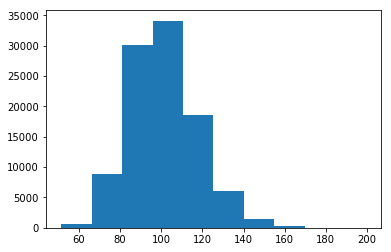

In [25]:
plt.hist(100*np.random.lognormal(sigma=.16, size=100000))